# import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
def predict_sex(name):
    name=str(name).split(' ')[0]
    sex_prediction = gender.Detector(case_sensitive=False)
    sex=sex_prediction.get_gender(name)
    sex_dic={'female':2,"male":1,'unknown':0,'mostly_female':-2 ,'mostly_male':-1,'andy':-3}
    return sex_dic[sex]

def creation_year(year):
    try:
        dt = datetime.strptime(str(year), '%Y-%m-%d %H:%M:%S')
        return dt.year
    except:
        return 0

def set_sex_code(x):
    x.loc[:,'sex_code']=predict_sex(x['name'])



# load data

In [16]:
data1 = pd.read_csv('cleandatafromAPI.csv')
def extract_features(x):
    x.loc[:,'sex_code']=x.apply(lambda row :predict_sex(row["display_name"]), axis=1)
    print('sex code done')
    x.loc[:,'created'] = x.apply(lambda row :creation_year(row["date_joined"]), axis=1)
    print('created done')
    x.loc[:,'most_recent_post'] = x.apply(lambda row :creation_year(row["most_recent_post"]), axis=1)
    print('most_recent_post done')
    x=x.loc[:]
    return x


In [17]:
data=extract_features(data1)
data.to_csv('features.csv', index=False)


sex code done
created done


/tmp/ipykernel_55892/3438781138.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,'most_recent_post'] = x.apply(lambda row :creation_year(row["most_recent_post"]), axis=1)


most_recent_post done


split data

<class 'pandas.core.frame.DataFrame'>

 Training Accuracy score: 0.9992289333578116
Testing Accuracy score: 0.8911734469085034
RandomForestClassifier score: 0.9992289333578116
classification_report 
               precision    recall  f1-score   support

         bot       0.87      0.79      0.83      2309
       human       0.90      0.94      0.92      4500

    accuracy                           0.89      6809
   macro avg       0.89      0.87      0.88      6809
weighted avg       0.89      0.89      0.89      6809



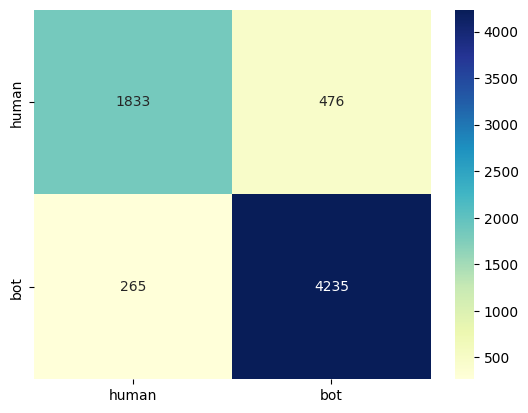

In [9]:
data = pd.read_csv('./features.csv')
print(type(data))
clf=RandomForestClassifier()
# ,'description','location','url','sex_code','verified','created','sex_code','tweet_language','tweets_by_day_of_week','tweets_by_hour_of_day'
x=data.loc[:,['statuses','most_recent_post','following','followers','created','likes','lists','tweets_this_week','retweeted_count']]
y = data.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
clf.fit(x_train,y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("RandomForestClassifier score:",clf.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, columns=[ 'human', 'bot'], 
                        index=[ 'human', 'bot'])
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   
